# Practica 2

**Objetivo:** A partir del [corpus proporcionado](./../99_corpus/corpusML.txt) realizar un modelo del lenguaje neuronal con base en la arquitectura propuesta por Bengio (2003).

In [1]:
from re import sub
from unicodedata import normalize
from nltk.stem.snowball import SpanishStemmer

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.optimize import minimize as min

`1. Limpiar los textos y aplicar stemming a las palabras.`

In [2]:
# Abrir el documento
text = open('./../99_corpus/corpusML.txt','r',encoding='utf-8').read()

In [3]:
# Limpiamos el documento
text_clean = ""
lines = []

for line in text.split("\n"):
    # Eliminamos caracteres compuestos y pasamos a minusculas
    line = normalize('NFKC', line).lower()
    # Eliminamos extensiones y numeros
    line = sub(r"\\.*|{.*}|\\|\[.*\]|[!-@[-`{-~]", ' ', line)
    # Eliminamos signos de puntuacion
    line = sub(r"[^\w]", " ", line)
    # Eliminamos saltos de linea
    line = " ".join(line.split())
    # Si la linea no esta vacia la añadimos al texto limpio
    if line:
        lines.append(line)
        
text_clean += " ".join(lines)
text_clean = text_clean.split()

print("Hay un total de: ", len(text_clean), " palabras detectadas")
#print(text_clean)

Hay un total de:  8798  palabras detectadas


In [4]:
# Aplicamos Stemming a los tokens limpios
# Debido a que el corpus se encuentra en español, utilizaremos el stemmer de NLTK para español.

stemmer = SpanishStemmer()
stems = [stemmer.stem(word) for word in text_clean]

print("Hay un total de: ", len(stems), " stems")
#print(stems)

Hay un total de:  8798  stems


`-> Obtener las frecuencias de los tipos en el corpus.`

In [5]:
# Obtener frecuencias
frecs = np.array(sorted(Counter(stems).values(), reverse=True))

`-> Ordenar por el rango estadistico de mayor a menor.`

In [6]:
ranks = np.array(range(1,len(frecs)+1))

`-> Graficar el diagrama de dispersion rango-frecuencia en escala logaritmica.`

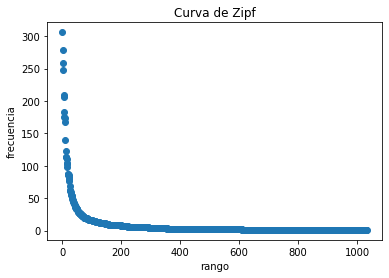

In [7]:
# Ploteo de la curva
plt.scatter(ranks,frecs)
plt.xlabel('rango')
plt.ylabel('frecuencia')
plt.title('Curva de Zipf')
plt.show()

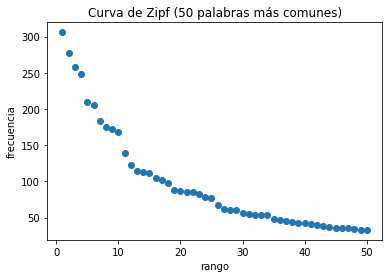

In [8]:
# Ploteo de la curva de las 50 mas comunes
plt.scatter(ranks[0:50],frecs[0:50])
plt.xlabel('rango')
plt.ylabel('frecuencia')
plt.title('Curva de Zipf (50 palabras más comunes)')
plt.show()

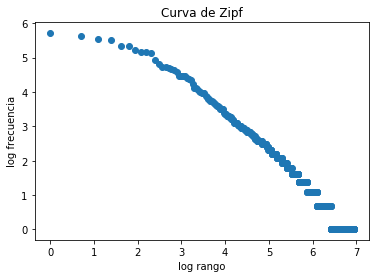

In [9]:
# Obtención de logaritmos
log_ranks = np.log(ranks)
log_frecs = np.log(frecs)

# Ploteo en escala logaritmoca
plt.scatter(log_ranks,log_frecs)
plt.xlabel('log rango')
plt.ylabel('log frecuencia')
plt.title('Curva de Zipf')
plt.show()

`-> Obtener el parametro de la distribucion de Zipf, α (a partir de un procedimiento de regresion).`

In [10]:
# Obtenemos correlación lineal

# Número de valores
N = len(log_ranks)

# Media de rangos
m_r = (1./N)*log_ranks.sum(0)
# Media de frecuencias
m_f = (1./N)*log_frecs.sum(0)

# Varianza rangos
v_r = (1./N)*((log_ranks-m_r)**2).sum(0)
# Varianza frecuencias
v_f = (1./N)*((log_frecs-m_f)**2).sum(0)

# Desviación estándar rangos
s_r = np.sqrt(v_r)
# Desviación estándar frecuencias
s_f = np.sqrt(v_f)

# Covarianza
cov = (1./N)*np.dot(log_ranks-m_r,log_frecs-m_f)
# Correlacion
corr = cov/(s_r*s_f)

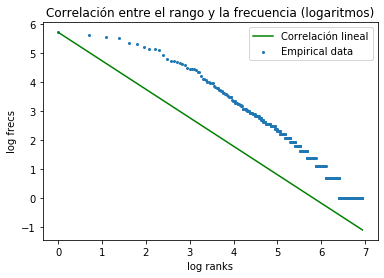

In [11]:
plt.scatter(log_ranks,log_frecs, label='Empirical data', s=4)
plt.plot(log_ranks,corr*log_ranks+ log_frecs[0], color='g', label='Correlación lineal')
plt.title('Correlación entre el rango y la frecuencia (logaritmos)')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [12]:
# Obtenemos correlación por MSE

#Función de minimización
func = lambda a: sum(((a*log_ranks + log_frecs[0])-log_frecs)**2)
#Inicialización
a0 = 1

#Minimización
a_hat = min(func, a0).x[0]

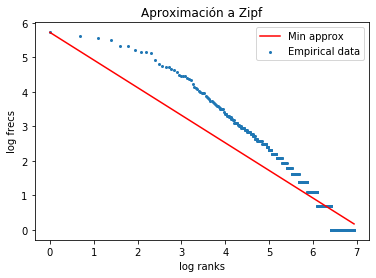

In [13]:
plt.scatter(log_ranks,log_frecs, label='Empirical data', s=4)
plt.plot(log_ranks,a_hat*log_ranks+ log_frecs[0], color='r', label='Min approx')
plt.title('Aproximación a Zipf')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

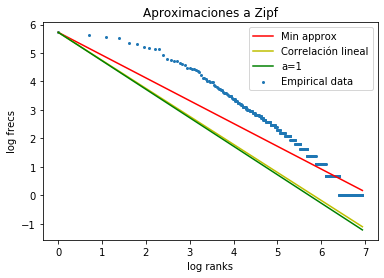

In [14]:
# Comparamos las aproximaciones
plt.scatter(log_ranks,log_frecs, label='Empirical data', s=4)
plt.plot(log_ranks,a_hat*log_ranks+ log_frecs[0], color='r', label='Min approx')
plt.plot(log_ranks,corr*log_ranks+ log_frecs[0], color='y', label='Correlación lineal')
plt.plot(log_ranks,-log_ranks+ log_frecs[0], color='g', label='a=1')
plt.title('Aproximaciones a Zipf')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()